Advanced
* Color Spaces  
* Color Channels  
* Blurring  
* BITWISE operations  
* Masking  
* Histogram Computation  
* Thresholding/Binarizing Images  
* Edge Detection  

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

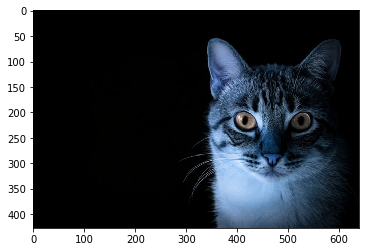

In [7]:
# Color Spaces

# Open image
img = cv.imread('Resources/Photos/cat.jpg')

# # BGR to Gray scale
# gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# cv.imshow('Gray', gray)

# # BGR to HSV
# hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
# cv.imshow('HSV', hsv)

# # BGR to LAB
# lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
# cv.imshow('LAB', lab)

# BGR to RGB
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)


# cv.waitKey(0)

# RGB image not BGR
plt.imshow(img)
plt.show()

(427, 640, 3)
(427, 640)
(427, 640)
(427, 640)


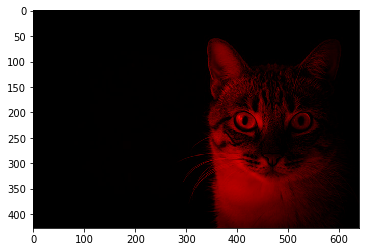

In [8]:
# Color Channels
img = cv.imread('Resources/Photos/cat.jpg')

# split
b, g, r = cv.split(img)
#cv.imshow('Blue', b)

print(img.shape)
print(b.shape)
print(g.shape)
print(r.shape)

# merge
merged = cv.merge([b,g,r])
#cv.imshow('Merged', merged)

blank = np.zeros(img.shape[:2], dtype='uint8')
blue = cv.merge([b, blank, blank])

cv.waitKey(0)

plt.show()

In [10]:
# Blurring
img = cv.imread('Resources/Photos/cats.jpg')
cv.imshow('Cats', img)


# Average
average = cv.blur(img, (3,3))
cv.imshow('Average Blur', average)

# Guassian Blur
gauss = cv.GaussianBlur(img, (3,3), 0)
cv.imshow('Guassian Blur', gauss)

# median Blur
median = cv.medianBlur(img, 3)
cv.imshow('Median Blur', median)

# Bilateral
bilateral = cv.bilateralFilter(img, 5, 15, 15)
cv.imshow('Bilateral Blur', bilateral)

cv.waitKey(0)

-1

In [ ]:
import cv2 as cv
import numpy as np

In [13]:
# BITWISE operations

blank = np.zeros((400,400), dtype='uint8')

rectangle = cv.rectangle(blank.copy(), (30,30), (370,370), 255, -1)
circle = cv.circle(blank.copy(), (200,200), 200, 255, -1)

cv.imshow('Rectangle', rectangle)
cv.imshow('Circle', circle)

# bitwise AND
bitwise_and = cv.bitwise_and(rectangle, circle)
cv.imshow('BITWISE_AND', bitwise_and)

# bitwise OR
bitwise_or = cv.bitwise_or(rectangle, circle)
cv.imshow('BITWISE_OR', bitwise_or)

# bitwise XOR
bitwise_xor = cv.bitwise_xor(rectangle, circle)
cv.imshow('BITWISE_XOR', bitwise_xor)

# bitwise XOR
bitwise_not = cv.bitwise_not(rectangle, circle)
cv.imshow('BITWISE_XOR', bitwise_not)



cv.waitKey(0)

-1

In [2]:
import cv2 as cv
import numpy as np

img = cv.imread('Resources/Photos/cats.jpg')
cv.imshow('Cats', img)

cv.waitKey(0)

-1

In [4]:
# Masking

blank = np.zeros(img.shape[:2], dtype='uint8')

mask = cv.circle(blank, (img.shape[1]//2, img.shape[0]//2), 100, 255, -1)
cv.imshow('Mask', mask)

masked = cv.bitwise_and(img, img, mask=mask)
cv.imshow('Masked', masked)

cv.waitKey(0)

-1

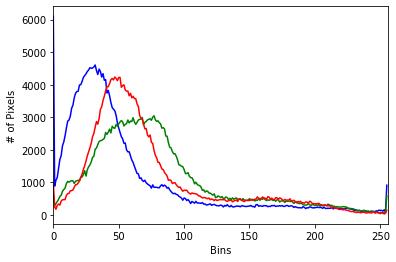

-1

In [6]:
# Computing Histograms

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# mask
blank = np.zeros(img.shape[:2], dtype='uint8')

mask = cv.circle(blank, (img.shape[1]//2, img.shape[0]//2), 100, 255, -1)
masked = cv.bitwise_and(gray, gray, mask=mask)

cv.imshow('Masked', masked)
# Grayscale histogram
gray_hist = cv.calcHist([gray], [0], mask, [256], [0,256])

plt.title('Histogram')
plt.figure('Grayscale Histogram')
plt.xlabel('Bins')
plt.ylabel('# of Pixels')
# plt.plot(gray_hist)

# plt.show()

# Color histogram
colors = ('b', 'g', 'r')
for i,col in enumerate(colors):
    hist = cv.calcHist([img], [i], None, [256], [0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])
    
plt.show()
    
cv.waitKey(0)

In [10]:
# Thresholding/Binarizing Images

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# simple Thresholding
threshold, thresh = cv.threshold(gray, 150, 255, cv.THRESH_BINARY)
cv.imshow('Thresh Image', thresh)

# Adapting Thresholding
adaptive_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C,
                                       cv.THRESH_BINARY, 11, 3)
cv.imshow('Adaptive Threshold', adaptive_thresh)

cv.waitKey(0)

-1

In [15]:
# Edge Detection

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Laplacian
lap = cv.Laplacian(gray, cv.CV_64F)
lap = np.uint8(np.absolute(lap))
cv.imshow('Laplacian', lap)

# Sobel
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1)
combined_sobel = cv.bitwise_and(sobelx, sobely)


cv.imshow('Sobelx', sobelx)
cv.imshow('Sobely', sobely)
cv.imshow('Combined', combined_sobel)

canny = cv.Canny(gray, 150, 175)
cv.imshow('Canny', canny)

cv.waitKey(0)

-1